In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

COVID = pd.read_excel('./owid-covid-data.xlsx')
COVID = COVID.fillna(0)
COVID.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0


## 유럽 대륙

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
import time
from sklearn.ensemble import GradientBoostingRegressor

warnings.filterwarnings('ignore')

In [6]:
COVID[COVID['location'] == 'Europe']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
53674,OWID_EUR,0,Europe,2020-01-23,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53675,OWID_EUR,0,Europe,2020-01-24,2.0,2.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53676,OWID_EUR,0,Europe,2020-01-25,3.0,1.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53677,OWID_EUR,0,Europe,2020-01-26,3.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53678,OWID_EUR,0,Europe,2020-01-27,4.0,1.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54506,OWID_EUR,0,Europe,2022-05-04,193661989.0,257821.0,254262.857,1821989.0,1300.0,1030.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54507,OWID_EUR,0,Europe,2022-05-05,193944851.0,282862.0,245068.286,1823589.0,1600.0,1030.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54508,OWID_EUR,0,Europe,2022-05-06,194159172.0,214321.0,226117.429,1824555.0,966.0,986.714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54509,OWID_EUR,0,Europe,2022-05-07,194282903.0,123731.0,223630.571,1824985.0,430.0,980.429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
COVIDeur = COVID[COVID['location'] == 'Europe']

In [31]:
X = COVIDeur[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = COVIDeur['new_deaths']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [33]:
model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9551275023217383
0.8992301750136402


In [34]:
scores = []
scores.append(model.score(X_train, y_train))
scores.append(model.score(X_test, y_test))

In [10]:
# start_time = time.time()
# gb_clf = GradientBoostingClassifier(random_state=13)
# gb_clf.fit(X_train, y_train)
# gb_pred = gb_clf.predict(X_test)
# print('Fit time: ', time.time() - start_time)
# print('ACC: ', accuracy_score(y_test, gb_pred))

Fit time:  227.24416732788086
ACC:  0.02976190476190476


In [11]:
eur_csv = gb_clf.predict(X)
eur_csv

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 5.000e+00,
       4.000e+00, 4.000e+00, 5.000e+00, 1.900e+01, 2.900e+01, 2.900e+01,
       4.500e+01, 4.500e+01, 1.460e+02, 1.460e+02, 1.930e+02, 1.930e+02,
       2.410e+02, 2.000e+02, 3.720e+02, 3.720e+02, 5.020e+02, 5.030e+02,
       6.000e+02, 6.450e+02, 1.177e+03, 1.177e+03, 1.309e+03, 1.309e+03,
       1.575e+03, 1.847e+03, 2.228e+03, 2.295e+03, 2.652e+03, 2.566e+03,
       2.566e+03, 2.998e+03, 3.240e+03, 4.274e+03, 4.040e+02, 4.229e+03,
       3.923e+03, 3.063e+03, 3.421e+03, 5.061e+03, 3.882e+03, 4.773e+03,
       4.526e+03, 3.537e+03, 3.018e+03, 3.195e+03, 

In [16]:
# eur_csv = gb_clf.predict(X)
# COVIDeur = COVIDeur[['date', 'location', 'new_deaths']]
# COVIDeur['predict_death'] = eur_csv
# COVIDeur.to_excel('./GBMeur.xlsx')

In [17]:
COVIDeur = COVIDeur[['date', 'location', 'new_deaths']]

In [18]:
COVIDeur['predict_death'] = eur_csv

In [19]:
COVIDeur.to_excel('./GBMeur.xlsx')

## 아시아 대륙 

In [35]:
COVIDas = COVID[COVID['location'] == 'Asia']

In [36]:
X = COVIDas[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = COVIDas['new_deaths']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [38]:
model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9795926200845969
0.9325836384085893


In [39]:
scores.append(model.score(X_train, y_train))
scores.append(model.score(X_test, y_test))

In [23]:
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
print('Fit time: ', time.time() - start_time)
print('ACC: ', accuracy_score(y_test, gb_pred))

Fit time:  221.40487456321716
ACC:  0.005952380952380952


In [24]:
con = gb_clf.predict(X)
COVIDas = COVIDas[['date', 'location', 'new_deaths']]
COVIDas['predict_death'] = con
COVIDas.to_excel('./GBMas.xlsx')

## 3분위 중 1분위 

In [40]:
GBMhic = COVID[COVID['iso_code'] == 'OWID_HIC']

In [41]:
X = GBMhic[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = GBMhic['new_deaths']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [43]:
model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9445566696956489
0.8658287124443462


In [44]:
scores.append(model.score(X_train, y_train))
scores.append(model.score(X_test, y_test))

In [28]:
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
print('Fit time: ', time.time() - start_time)
print('ACC: ', accuracy_score(y_test, gb_pred))

Fit time:  281.7542152404785
ACC:  0.02976190476190476


In [29]:
con = gb_clf.predict(X)
GBMhic = GBMhic[['date', 'location', 'new_deaths']]
GBMhic['predict_death'] = con
GBMhic.to_excel('./GBMhic.xlsx')

## 3분위 중 2분위

In [45]:
GBMumc = COVID[COVID['iso_code'] == 'OWID_UMC']

In [46]:
X = GBMumc[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = GBMumc['new_deaths']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [48]:
model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9722506893865965
0.937988295268103


In [49]:
scores.append(model.score(X_train, y_train))
scores.append(model.score(X_test, y_test))

In [34]:
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
print('Fit time: ', time.time() - start_time)
print('ACC: ', accuracy_score(y_test, gb_pred))

Fit time:  222.2499396800995
ACC:  0.0


In [35]:
con = gb_clf.predict(X)
GBMumc = GBMumc[['date', 'location', 'new_deaths']]
GBMumc['predict_death'] = con
GBMumc.to_excel('./GBMumc.xlsx')

## 3분위 중 3분위

In [147]:
COVID[COVID['iso_code'] == 'OWID_LMC']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
98122,OWID_LMC,0,Lower middle income,2020-01-22,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98123,OWID_LMC,0,Lower middle income,2020-01-23,2.0,2.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98124,OWID_LMC,0,Lower middle income,2020-01-24,2.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98125,OWID_LMC,0,Lower middle income,2020-01-25,3.0,1.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98126,OWID_LMC,0,Lower middle income,2020-01-26,3.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98955,OWID_LMC,0,Lower middle income,2022-05-04,90644426.0,9095.0,10628.000,1308518.0,161.0,117.857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98956,OWID_LMC,0,Lower middle income,2022-05-05,90654298.0,9872.0,10030.429,1308581.0,63.0,104.857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98957,OWID_LMC,0,Lower middle income,2022-05-06,90663443.0,9145.0,9047.000,1308642.0,61.0,94.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98958,OWID_LMC,0,Lower middle income,2022-05-07,90671743.0,8300.0,8772.857,1308714.0,72.0,88.857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
GBMlmc = COVID[COVID['iso_code'] == 'OWID_LMC']

In [51]:
X = GBMlmc[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = GBMlmc['new_deaths']

In [52]:
model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9802447675617122
0.9150074876723119


In [53]:
scores.append(model.score(X_train, y_train))
scores.append(model.score(X_test, y_test))

In [54]:
scores

[0.9551275023217383,
 0.8992301750136402,
 0.9795926200845969,
 0.9325836384085893,
 0.9445566696956489,
 0.8658287124443462,
 0.9722506893865965,
 0.937988295268103,
 0.9802447675617122,
 0.9150074876723119]

In [152]:
con = model.predict(X)
GBMlmc = GBMlmc[['date', 'location', 'new_deaths']]
GBMlmc['predict_death'] = con
GBMlmc[GBMlmc['predict_death'] < 0] = 0
GBMlmc.to_excel('./GBMlmc.xlsx')

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
GBMumc1 = COVID[COVID['iso_code'] == 'OWID_UMC']

In [38]:
X = GBMumc1[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = GBMumc1['new_deaths']

In [ ]:
model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [44]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [46]:
print(model.score(X_train, y_train))

0.9722506893865965


In [48]:
print(model.score(X_test, y_test))

0.9377411077857654


In [ ]:
start_time = time.time()
gb_clf = GradientBoostingRegressor()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
print('Fit time: ', time.time() - start_time)
print('ACC: ', accuracy_score(y_test, gb_pred))

In [49]:
con = model.predict(X)
GBMumc1 = GBMumc1[['date', 'location', 'new_deaths']]
GBMumc1['predict_death'] = con
GBMumc1.to_excel('./GBMumc1.xlsx')

In [8]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error 
import pandas as pd 
import numpy as np

In [51]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1, 
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

In [52]:
pred = model.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, pred)) 
print("RMSE: %f" % (rmse))

RMSE: 410.150774


In [55]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [56]:
params = {"objective":"reg:linear",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,  
          'max_depth': 5, 
          'alpha': 10} 
cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=3, 
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

cv_results.head()

[13:57:51] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:57:51] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:57:51] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [57]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3115.919352,48.165859,3114.455648,95.842412
1,2852.512207,40.522019,2850.827799,97.317618
2,2607.955404,58.910034,2601.517904,68.267734
3,2395.468424,39.099944,2398.976318,73.352750
4,2237.893148,37.424947,2241.340169,75.670549


## 한국

In [153]:
COVID[COVID['iso_code'] == 'KOR']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
154398,KOR,Asia,South Korea,2020-01-22,1.0,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
154399,KOR,Asia,South Korea,2020-01-23,1.0,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
154400,KOR,Asia,South Korea,2020-01-24,2.0,1.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
154401,KOR,Asia,South Korea,2020-01-25,2.0,0.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
154402,KOR,Asia,South Korea,2020-01-26,3.0,1.0,0.000,0.0,0.0,0.000,...,6.2,40.9,0.0,12.27,83.03,0.916,43.4,0.17,2.47,0.845918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155231,KOR,Asia,South Korea,2022-05-04,17438068.0,42277.0,50206.000,23158.0,79.0,98.857,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
155232,KOR,Asia,South Korea,2022-05-05,17464782.0,26714.0,38595.143,23206.0,48.0,68.857,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
155233,KOR,Asia,South Korea,2022-05-06,17504334.0,39552.0,38065.143,23289.0,83.0,70.714,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
155234,KOR,Asia,South Korea,2022-05-07,17544398.0,40064.0,38392.714,23360.0,71.0,69.286,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000


In [55]:
GBMkr = COVID[COVID['iso_code'] == 'KOR']

X = GBMkr[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = GBMkr['new_deaths']

model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

con = model.predict(X)
GBMkr = GBMkr[['date', 'location', 'new_deaths']]
GBMkr['predict_death'] = con
GBMkr.to_excel('./GBMkr.xlsx')


0.9945211611775414
0.8696131719319733


In [56]:
scores.append(model.score(X_train, y_train))
scores.append(model.score(X_test, y_test))

## 일본

In [57]:
GBMjpn = COVID[COVID['iso_code'] == 'JPN']

In [58]:
X = GBMjpn[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = GBMjpn['new_deaths']

In [59]:
model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9751001812920634
0.9176896559363463


In [60]:
scores.append(model.score(X_train, y_train))
scores.append(model.score(X_test, y_test))

In [141]:
con = model.predict(X)
GBMjpn = GBMjpn[['date', 'location', 'new_deaths']]
GBMjpn['predict_death'] = con
GBMjpn.to_excel('./GBMjpn.xlsx')

## 미국

In [136]:
COVID[COVID['iso_code'] == 'USA']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
174033,USA,North America,United States,2020-01-22,1.0,0.0,0.000,0.0,0.0,0.000,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174034,USA,North America,United States,2020-01-23,1.0,0.0,0.000,0.0,0.0,0.000,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174035,USA,North America,United States,2020-01-24,2.0,1.0,0.000,0.0,0.0,0.000,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174036,USA,North America,United States,2020-01-25,2.0,0.0,0.000,0.0,0.0,0.000,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174037,USA,North America,United States,2020-01-26,5.0,3.0,0.000,0.0,0.0,0.000,...,19.1,24.6,0.0,2.77,78.86,0.926,-8926.0,-3.59,-2.63,-26.811643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174866,USA,North America,United States,2022-05-04,81620383.0,114308.0,61513.429,996704.0,1960.0,556.571,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174867,USA,North America,United States,2022-05-05,81694580.0,74197.0,61635.000,996964.0,260.0,542.857,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174868,USA,North America,United States,2022-05-06,81831854.0,137274.0,72666.857,997318.0,354.0,532.857,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000
174869,USA,North America,United States,2022-05-07,81858744.0,26890.0,73172.714,997503.0,185.0,541.571,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.00,0.00,0.000000


In [69]:
# params = {
#     "n_estimators": 500,
#     "max_depth": 4,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
# }

In [84]:
GBMus = COVID[COVID['iso_code'] == 'USA']

X = GBMus[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = GBMus['new_deaths']

model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

con = model.predict(X)
GBMus = GBMus[['date', 'location', 'new_deaths']]
GBMus['predict_death'] = con
GBMus[GBMus['predict_death'] < 0] = 0
GBMus.to_excel('./GBMus.xlsx')

0.9587490568413294
0.8944856655926633


In [62]:
scores.append(model.score(X_train, y_train))
scores.append(model.score(X_test, y_test))

In [85]:
from sklearn.metrics import r2_score

In [87]:
pred = model.predict(X_train)

In [88]:
r2_score(pred, y_train)

0.9539081775526391

In [64]:
scores

[0.9551275023217383,
 0.8992301750136402,
 0.9795926200845969,
 0.9325836384085893,
 0.9445566696956489,
 0.8658287124443462,
 0.9722506893865965,
 0.937988295268103,
 0.9802447675617122,
 0.9150074876723119,
 0.9945211611775414,
 0.8696131719319733,
 0.9751001812920634,
 0.9176896559363463,
 0.9587490568413294,
 0.8943751342642733]

In [ ]:
{'유럽': [0.9551275023217383,
 0.8992301750136402],
 '아시아': [0.9795926200845969,
 0.9325836384085893],
 '한국': [ 0.9945211611775414,
 0.8696131719319733,],
 '일본': [0.9751001812920634,
 0.9176896559363463,],
 '미국': [0.9587490568413294,
 0.8943751342642733],
 '1 / 3 분위': [0.9445566696956489,
 0.8658287124443462,],
 '2 / 3 분위': [0.9722506893865965,
 0.937988295268103,],
 '3 / 3 분위': [0.9802447675617122,
 0.9150074876723119,],}

---

In [98]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from lightgbm import LGBMRegressor 
import pandas as pd 
import numpy as np 
import seaborn as sns



In [124]:
COVIDkor = COVID[COVID['iso_code'] == 'KOR']

In [125]:
X = COVIDkor[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = COVIDkor['new_deaths']

In [114]:
rf = RandomForestRegressor() 
neg_mse_scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv =5) 
rmse_scores = np.sqrt(-1 * neg_mse_scores) 
avg_rmse = np.mean(rmse_scores) 
print("negative mse scores : ", np.round(neg_mse_scores, 2)) 
print("rmse scores : ",np.round(rmse_scores, 2)) 
print("avg socres : ", np.round(avg_rmse))



negative mse scores :  [-4.75000e+00 -8.37000e+00 -3.27400e+01 -1.42630e+02 -2.13674e+04]
rmse scores :  [  2.18   2.89   5.72  11.94 146.18]
avg socres :  34.0


In [115]:
def get_model_cv_prediction(model, X, y): 
    neg_mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv =5) 
    rmse_scores = np.sqrt(-1 * neg_mse_scores) 
    avg_rmse = np.mean(rmse_scores) 
    print("### {} ###".format(model.__class__.__name__)) 
    print("negative mse scores : ", np.round(neg_mse_scores, 2))
    print("rmse scores : ",np.round(rmse_scores, 2)) 
    print("avg socres : ", np.round(avg_rmse)) 
dt = DecisionTreeRegressor() 
rf = RandomForestRegressor() 
gb = GradientBoostingRegressor() 
lgb = LGBMRegressor() 
models = [dt, rf, gb, lgb] 
for model in models: 
    get_model_cv_prediction(model, X, y )



### DecisionTreeRegressor ###
negative mse scores :  [-5.850000e+00 -1.515000e+01 -5.863000e+01 -1.278700e+02 -2.102359e+04]
rmse scores :  [  2.42   3.89   7.66  11.31 145.  ]
avg socres :  34.0
### RandomForestRegressor ###
negative mse scores :  [-4.750000e+00 -8.010000e+00 -3.209000e+01 -1.547600e+02 -2.152499e+04]
rmse scores :  [  2.18   2.83   5.66  12.44 146.71]
avg socres :  34.0
### GradientBoostingRegressor ###
negative mse scores :  [-3.585500e+02 -1.057000e+01 -2.702000e+01 -1.344800e+02 -2.148965e+04]
rmse scores :  [ 18.94   3.25   5.2   11.6  146.59]
avg socres :  37.0
### LGBMRegressor ###
negative mse scores :  [-1.005000e+01 -2.650000e+01 -3.517900e+02 -9.079000e+01 -2.233871e+04]
rmse scores :  [  3.17   5.15  18.76   9.53 149.46]
avg socres :  37.0


In [121]:
from xgboost import XGBRegressor

In [122]:
xgb = XGBRegressor()

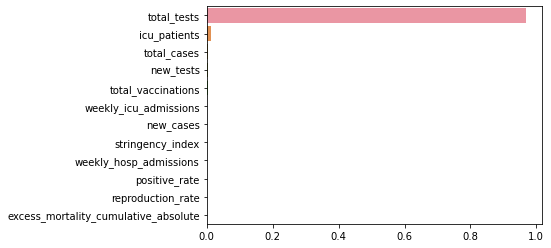

In [126]:
xgb.fit(X, y) 
feature_series = pd.Series(data=xgb.feature_importances_,index=X.columns) 
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)

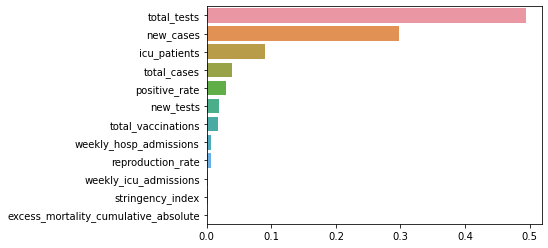

In [116]:
rf.fit(X, y) 
feature_series = pd.Series(data=rf.feature_importances_,index=X.columns) 
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)



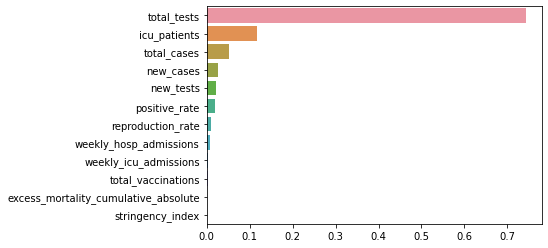

In [117]:
dt.fit(X, y) 
feature_series = pd.Series(data=dt.feature_importances_,index=X.columns) 
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)

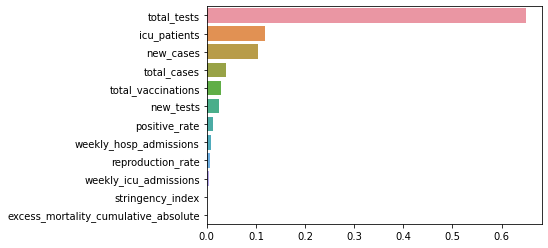

In [118]:
gb.fit(X, y) 
feature_series = pd.Series(data=gb.feature_importances_,index=X.columns) 
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)

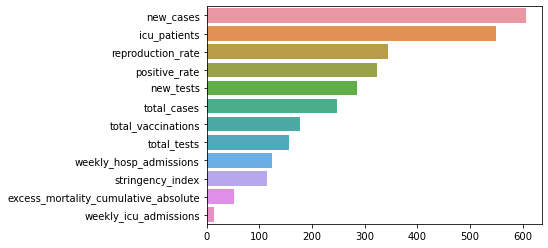

In [119]:
lgb.fit(X, y) 
feature_series = pd.Series(data=lgb.feature_importances_,index=X.columns) 
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)

In [103]:
from sklearn.linear_model import LinearRegression

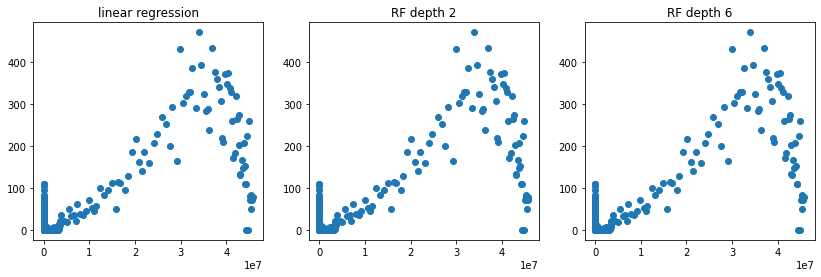

In [120]:
lr = LinearRegression() 
rf_dep2 = DecisionTreeRegressor(max_depth=2) 
rf_dep6 = DecisionTreeRegressor(max_depth=6) 
X_train = COVIDkor["total_tests"].values.reshape(-1, 1) 
y_train = COVIDkor["new_deaths"].values.reshape(-1, 1) 
lr.fit(X_train, y_train) 
rf_dep2.fit(X_train, y_train) 
rf_dep6.fit(X_train, y_train) 
X_test = np.linspace(5, 8, 100).reshape(-1, 1) 
pred_lr = lr.predict(X_test) 
pred_rf_dep2 = rf_dep2.predict(X_test) 
pred_rf_dep6 = rf_dep6.predict(X_test) 
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3) 

ax1.set_title("linear regression") 
ax1.scatter(COVIDkor.total_tests,COVIDkor.new_deaths) 
ax1.plot(X_test, pred_lr) 
ax2.set_title("RF depth 2") 
ax2.scatter(COVIDkor.total_tests,COVIDkor.new_deaths) 
ax2.plot(X_test, pred_rf_dep2, color="red") 
ax3.set_title("RF depth 6") 
ax3.scatter(COVIDkor.total_tests,COVIDkor.new_deaths) 
ax3.plot(X_test, pred_rf_dep6, color="green")


---

## 한국

In [ ]:
gbc = GradientBoostingClassifier(max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
n_feature = COVIDkor.data.shape[1]
index=np.arange(n_feature)
plt.barh(index, gbc.feature_importances_, align='center')
plt.yticks(index, cancer.feature_names)
plt.xlabel('feature importances', size=15)
plt.ylabel('feature', size=15)
plt.show()

In [63]:
COVIDkor = COVID[COVID['iso_code'] == 'KOR']

In [95]:
X = COVIDkor[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = COVIDkor['new_deaths']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [97]:
model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9945211611775414
0.8676788790995996


In [ ]:
gbc = GradientBoostingClassifier(max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
n_feature = COVIDkor.data.shape[1]
index=np.arange(n_feature)
plt.barh(index, gbc.feature_importances_, align='center')
plt.yticks(index, COVIDkor.feature_names)
plt.xlabel('feature importances', size=15)
plt.ylabel('feature', size=15)
plt.show()

In [89]:
COVIDkor = pd.read_excel('./owid-covid-data-ko.xlsx')
COVIDkor = COVIDkor.fillna(0)
COVIDkor.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,KOR,Asia,South Korea,2020-01-22,1,0.0,0.0,0.0,0.0,0.0,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
1,KOR,Asia,South Korea,2020-01-23,1,0.0,0.0,0.0,0.0,0.0,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
2,KOR,Asia,South Korea,2020-01-24,2,1.0,0.0,0.0,0.0,0.0,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
3,KOR,Asia,South Korea,2020-01-25,2,0.0,0.0,0.0,0.0,0.0,...,6.2,40.9,0.0,12.27,83.03,0.916,0.0,0.00,0.00,0.000000
4,KOR,Asia,South Korea,2020-01-26,3,1.0,0.0,0.0,0.0,0.0,...,6.2,40.9,0.0,12.27,83.03,0.916,43.4,0.17,2.47,0.845918


In [103]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

COVIDkor = pd.read_excel('./owid-covid-data-ko.xlsx')
COVIDkor = COVIDkor.fillna(0)
COVIDkor.head()

X = COVIDkor[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = COVIDkor['new_deaths']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = XGBRegressor(**params)
reg.fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
print("The mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print(r2_score(reg.predict(X_test), y_test))

[20:50:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "loss", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


The mean squared error (RMSE) on test set: 22.8428
0.9028623918300004


In [90]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [91]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [92]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1, 
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
    

In [100]:
xg_reg.fit(X_train,y_train) 
pred = xg_reg.predict(X)

[20:44:51] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred

In [101]:
reg = XGBRegressor(**params)
reg.fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
print("The mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print(r2_score(reg.predict(X_test), y_test))

[20:44:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "loss", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


The mean squared error (RMSE) on test set: 22.8428


In [102]:
r2_score(reg.predict(X_test), y_test)

0.9028623918300004

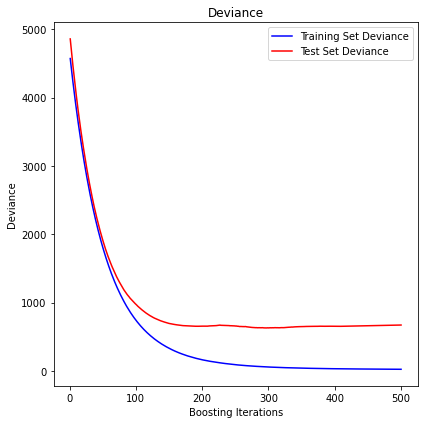

In [87]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(COVIDkor.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(COVIDkor.feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [67]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1, 
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

In [68]:
pred = model.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, pred)) 
print("RMSE: %f" % (rmse))

RMSE: 22.396741


In [104]:

X = COVIDkor[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = COVIDkor['new_deaths']

In [111]:
import xgboost as xgb


In [112]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [120]:
params = {"objective":"reg:linear",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,  
          'max_depth': 5, 
          'alpha': 10} 
cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=2, 
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

cv_results.head()

[20:59:42] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:59:42] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,67.310627,2.631611,67.210522,3.243519
1,62.269487,1.583299,62.504118,4.518152
2,56.969406,1.458691,57.322515,4.624002
3,52.132049,1.407853,52.561503,4.764746
4,47.722052,1.270689,48.300999,4.914821


In [72]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[14:12:27] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [74]:
!pip install graphviz

     ---------------------------------------- 47.0/47.0 KB ? eta 0:00:00


In [75]:
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_tree

In [ ]:
model = XGBRegressor()
model.fit(X, y)
# plot single tree
plot_tree(model)
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
xgb.plot_tree(xg_reg,num_trees=0) 
plt.rcParams['figure.figsize'] = [50, 10] 
plt.show()

In [76]:
X = COVIDkor[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = COVIDkor['new_deaths']

NameError: name 'COVIDkor' is not defined

In [73]:
kor_gb_reg = GradientBoostingRegressor(random_state=13)
kor_gb_reg.fit(X, y)

GradientBoostingRegressor(random_state=13)

In [74]:
kor_pred_GBM = kor_gb_reg.predict(X).round(0)
GBM_rmse = np.sqrt(mean_squared_error(y, kor_pred_GBM)) 

lm = sm.OLS(y, X).fit()
print(lm.summary())
kor_pred_lm = lm.predict(X).round(0)
LM_rmse = np.sqrt(mean_squared_error(y, kor_pred_lm)) 

xg_reg = XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1, 
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

xg_reg.fit(X,y) 
eur_pred_XGB = xg_reg.predict(X)
XGB_rmse = np.sqrt(mean_squared_error(y, eur_pred_XGB))

print('GBM_rmse : ', GBM_rmse)
print('LM_rmse : ', LM_rmse)
print('XGB_rmse : ', XGB_rmse)

                                 OLS Regression Results                                
Dep. Variable:             new_deaths   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              467.2
Date:                Thu, 12 May 2022   Prob (F-statistic):                        0.00
Time:                        19:01:05   Log-Likelihood:                         -6514.1
No. Observations:                 838   AIC:                                  1.305e+04
Df Residuals:                     827   BIC:                                  1.310e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

NameError: name 'XGBRegressor' is not defined

In [77]:
COVID_KOR = COVID[COVID['location'] == 'South Korea']

X = COVID_KOR[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = COVID_KOR['new_deaths']

kor_gb_reg = GradientBoostingRegressor(random_state=13)
kor_gb_reg.fit(X, y)

kor_pred_GBM = kor_gb_reg.predict(X).round(0)
GBM_rmse = np.sqrt(mean_squared_error(y, kor_pred_GBM)) 

lm = sm.OLS(y, X).fit()
print(lm.summary())
kor_pred_lm = lm.predict(X).round(0)
LM_rmse = np.sqrt(mean_squared_error(y, kor_pred_lm)) 

xg_reg = XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1, 
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

xg_reg.fit(X,y) 
eur_pred_XGB = xg_reg.predict(X)
XGB_rmse = np.sqrt(mean_squared_error(y, eur_pred_XGB))

print('GBM_rmse : ', GBM_rmse)
print('LM_rmse : ', LM_rmse)
print('XGB_rmse : ', XGB_rmse)

                                 OLS Regression Results                                
Dep. Variable:             new_deaths   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              942.9
Date:                Thu, 12 May 2022   Prob (F-statistic):                        0.00
Time:                        19:02:07   Log-Likelihood:                         -3669.4
No. Observations:                 838   AIC:                                      7363.
Df Residuals:                     826   BIC:                                      7420.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [81]:
X = COVID[['total_cases',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'total_vaccinations',
 'stringency_index',
 'new_cases',
 'weekly_hosp_admissions',
 'weekly_icu_admissions',
 'positive_rate',
 'reproduction_rate',
'new_tests',
'total_tests']]
y = COVID['new_deaths']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

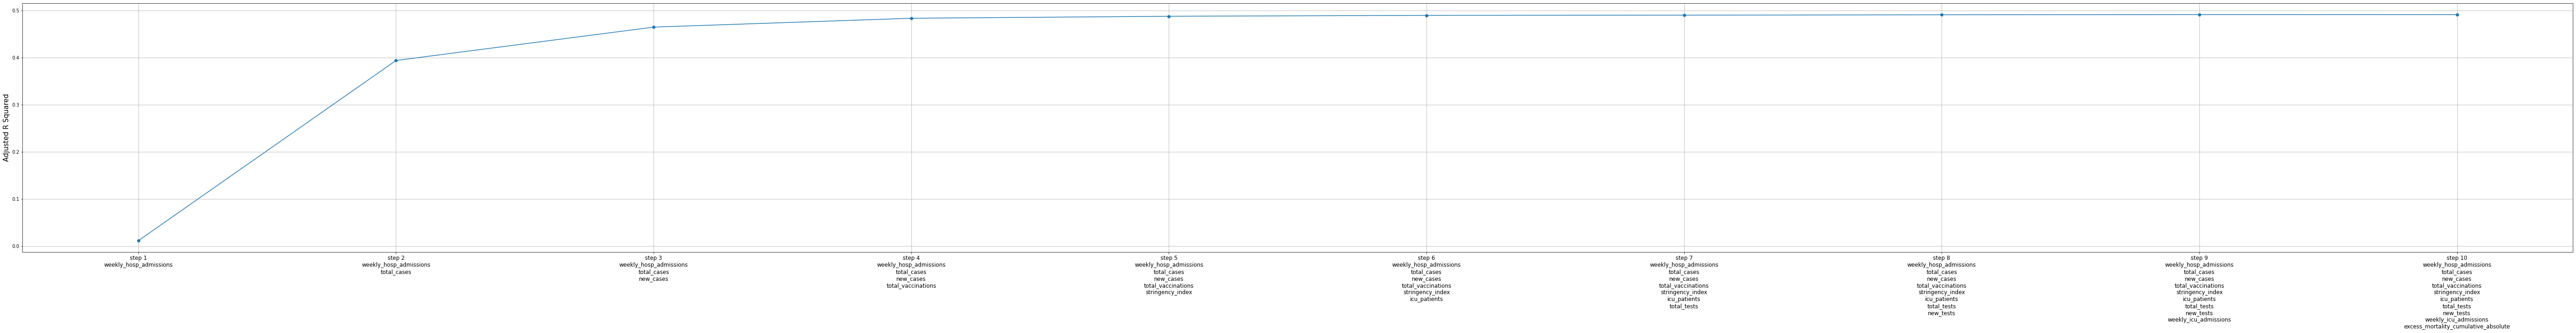

In [83]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ): 
    import statsmodels.api as sm 
    import matplotlib.pyplot as plt 
    import warnings 
    warnings.filterwarnings("ignore") 
    y = y_train ## 반응 변수 
    selected_variables = [] ## 선택된 변수들 
    sl_enter = 0.05 
    sl_remove = 0.05 
    sv_per_step = [] ## 각 스텝별로 선택된 변수들 
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수 
    steps = [] ## 스텝 
    step = 0 
    while len(variables) > 0: 
        remainder = list(set(variables) - set(selected_variables)) 
        pval = pd.Series(index=remainder) ## 변수의 p-value ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 ## 선형 모형을 적합한다. 
        for col in remainder: 
            X = X_train[selected_variables+[col]] 
            X = sm.add_constant(X) 
            model = sm.OLS(y,X).fit(disp=0) 
            pval[col] = model.pvalues[col] 
            min_pval = pval.min() 
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함 
            selected_variables.append(pval.idxmin()) ## 선택된 변수들에대해서 ## 어떤 변수를 제거할지 고른다. 
            while len(selected_variables) > 0: 
                selected_X = X_train[selected_variables] 
                selected_X = sm.add_constant(selected_X) 
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다 
                max_pval = selected_pval.max() 
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외 
                    remove_variable = selected_pval.idxmax() 
                    selected_variables.remove(remove_variable) 
                else: 
                    break 
            step += 1 
            steps.append(step) 
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj 
            adjusted_r_squared.append(adj_r_squared) 
            sv_per_step.append(selected_variables.copy()) 
        else: 
            break 
    fig = plt.figure(figsize=(100,10)) 
    fig.set_facecolor('white') 
    font_size = 15 
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12) 
    
    plt.plot(steps,adjusted_r_squared, marker='o') 
    
    plt.ylabel('Adjusted R Squared',fontsize=font_size) 
    plt.grid(True) 
    plt.show() 

    return selected_variables 
selected_variables = stepwise_feature_selection(X_train, y_train)